In [ ]:

import pandas as pd

# Load from OpenML
df = pd.read_csv("boston_housing.csv")

print(df.head())

# Features (X) and Target (y)
X = df.drop(columns=["MEDV"])   # MEDV = Median house value
y = df["MEDV"]


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


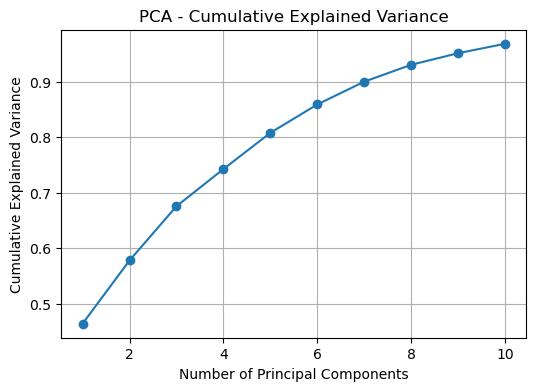

===== Linear Regression Comparison =====
Without PCA -> MSE: 24.2911, R²: 0.6688
With PCA    -> MSE: 28.6923, R²: 0.6087
Number of PCs used: 10


In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # keep top 10 PCs
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance visualization
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid()
plt.show()

# Train Linear Regression (on PCA-reduced data)
lr = LinearRegression()
lr.fit(X_train_pca, y_train)
y_pred_pca = lr.predict(X_test_pca)

# Train Linear Regression (without PCA, baseline)
lr_base = LinearRegression()
lr_base.fit(X_train_scaled, y_train)
y_pred_base = lr_base.predict(X_test_scaled)

# Compare results
print("===== Linear Regression Comparison =====")
print(f"Without PCA -> MSE: {mean_squared_error(y_test, y_pred_base):.4f}, R²: {r2_score(y_test, y_pred_base):.4f}")
print(f"With PCA    -> MSE: {mean_squared_error(y_test, y_pred_pca):.4f}, R²: {r2_score(y_test, y_pred_pca):.4f}")
print(f"Number of PCs used: 10")


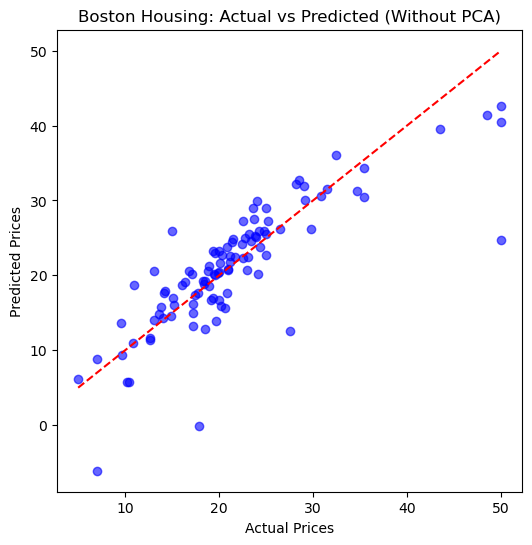

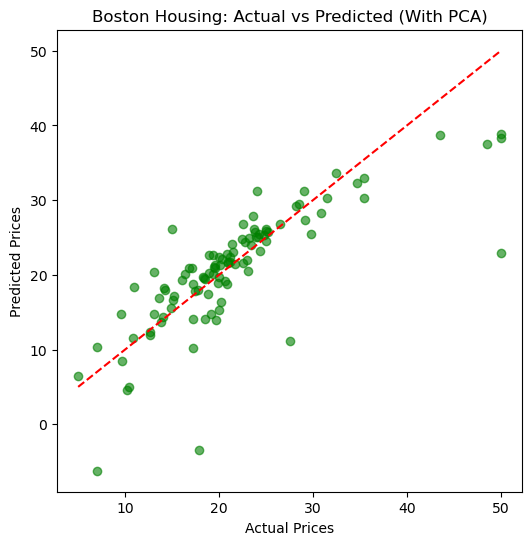

Predictions successfully exported to predictions.csv
     Actual_Prices  Predicted_Prices_Base  Predicted_Prices_PCA
173           23.6              28.996724             27.810220
274           32.4              36.025565             33.626946
491           13.6              14.816944             16.912312
72            22.8              25.031979             24.405485
452           16.1              18.769880             19.352319


In [ ]:
import matplotlib.pyplot as plt

# Without PCA
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_base, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Boston Housing: Actual vs Predicted (Without PCA)")
plt.show()

# With PCA
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_pca, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Boston Housing: Actual vs Predicted (With PCA)")
plt.show()


predictions_df = pd.DataFrame({
    'Actual_Prices': y_test,
    'Predicted_Prices_Base': y_pred_base,
    'Predicted_Prices_PCA': y_pred_pca
})

# Export the DataFrame to a .csv file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions successfully exported to predictions.csv")
print(predictions_df.head())